In [41]:
import zipfile

# Open the zip file
with zipfile.ZipFile("D:\\AD\\AD.zip", "r") as zip_ref:
    # Extract the contents of the zip file
    zip_ref.extractall("D:\\AD\\AD_folder")

In [42]:
import zipfile

# Open the zip file
with zipfile.ZipFile("D:\\MCI\\MCI.zip", "r") as zip_ref:
    # Extract the contents of the zip file
    zip_ref.extractall("D:\\MCI\\MCI_folder")

In [43]:
import os

folder_path_AD = 'D:\AD\AD_folder\ADNI'

# Get a list of all files in the folder
files = [f for f in os.listdir(folder_path_AD) if os.path.isfile(os.path.join(folder_path_AD, f))]

# Iterate through the list of files
for file_name in files:
    # Get the full path of the file
    file_path = os.path.join(folder_path_AD, file_name)

    # Read the contents of the file here

    # Do any necessary processing or analysis on the contents of the file

In [44]:
import os

folder_path_AD = 'D:\AD\AD_folder\ADNI'

# Get a list of all files in the folder
files = [f for f in os.listdir(folder_path_AD) if os.path.isfile(os.path.join(folder_path_AD, f))]

# Iterate through the list of files
for file_name in files:
    # Get the full path of the file
    file_path = os.path.join(folder_path_AD, file_name)

    # Read the contents of the file here

    # Do any necessary processing or analysis on the contents of the file

In [45]:
import os

folder_path_MCI = 'D:\MCI\MCI_folder\ADNI'

# Get a list of all files in the folder
files = [f for f in os.listdir(folder_path_MCI) if os.path.isfile(os.path.join(folder_path_MCI, f))]

# Iterate through the list of files
for file_name in files:
    # Get the full path of the file
    file_path = os.path.join(folder_path_MCI, file_name)

    # Read the contents of the file here

    # Do any necessary processing or analysis on the contents of the file

In [46]:
import os
import shutil

root_dir = 'D:\AD\AD_folder\ADNI'
destination_folder_AD = 'D:\AD\AD_folder\AD_preprocess'

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file.endswith('.nii'):
            shutil.copy2(file_path, destination_folder)

In [47]:
import os
import shutil

root_dir = 'D:\MCI\MCI_folder\ADNI'
destination_folder_MCI = 'D:\MCI\MCI_folder\MCI_preprocess'

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file.endswith('.nii'):
            shutil.copy2(file_path, destination_folder)

In [48]:
import os
import re

folder_path = destination_folder_AD

# Get all the files in the folder
files = os.listdir(folder_path)

# Loop through the files in the folder
for i, file_name in enumerate(files):
    # Check if the file is a .nii file
    if file_name.endswith(".nii"):
        # Create the new file name
        new_file_name = "AD_{}.nii".format(i + 1)
        
        # Get the full path of the old and new file
        old_file_path = os.path.join(folder_path, file_name)
        new_file_path = os.path.join(folder_path, new_file_name)
        
        # Rename the file
        os.rename(old_file_path, new_file_path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:\\AD\\AD_folder\\AD_preprocess\\AD_10.nii' -> 'D:\\AD\\AD_folder\\AD_preprocess\\AD_2.nii'

In [49]:
import os
import re

folder_path = destination_folder_MCI

# Get all the files in the folder
files = os.listdir(folder_path)

# Loop through the files in the folder
for i, file_name in enumerate(files):
    # Check if the file is a .nii file
    if file_name.endswith(".nii"):
        # Create the new file name
        new_file_name = "MCI_{}.nii".format(i + 1)
        
        # Get the full path of the old and new file
        old_file_path = os.path.join(folder_path, file_name)
        new_file_path = os.path.join(folder_path, new_file_name)
        
        # Rename the file
        os.rename(old_file_path, new_file_path)

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\MCI\\MCI_folder\\MCI_preprocess\\MCI_1.nii' -> 'D:\\MCI\\MCI_folder\\MCI_preprocess\\MCI_1.nii'

In [1]:
import glob
import os
import nibabel as nib
import numpy as np
import cv2
import tensorflow as tf

def preprocess_data(data_dir):
    files = glob.glob(os.path.join(data_dir, '*.nii'))
    data = [nib.load(f).get_fdata() for f in files]
    slices = []

    max_shape = [0, 0]
    for d in data:
        for i in range(d.shape[2]):
            slice = d[:, :, i]
            slice = (slice - slice.mean()) / slice.std()
            slice_shape = cv2.resize(slice, (224,224), interpolation=cv2.INTER_CUBIC).shape[:2]
            max_shape = np.maximum(max_shape, slice_shape)

    for d in data:
        for i in range(d.shape[2]):
            slice = d[:, :, i]
            slice = (slice - slice.mean()) / slice.std()
            slice = cv2.resize(slice, (max_shape[1], max_shape[0]), interpolation=cv2.INTER_CUBIC)
            slice = np.uint8(slice)
            slice = cv2.cvtColor(slice, cv2.COLOR_GRAY2RGB)
            slices.append(slice)

    print("Original data shape: ", data[0].shape)
    print("Resized and converted data shape: ", slices[0].shape)
    return slices

def prepare_data(slices):
    # Convert data to float32 and normalize
    slices = np.array(slices, dtype='float32') / 255.
    # Subtract the ImageNet mean pixel values
    slices = slices - np.array([0.485, 0.456, 0.406])
    # Divide by the ImageNet standard deviation
    slices = slices / np.array([0.229, 0.224, 0.225])
    return slices

mci_data = preprocess_data('D:\\MCI\\MCI_folder\\MCI_preprocess')
mci_data = prepare_data(mci_data)

ad_data = preprocess_data('D:\AD\AD_folder\AD_preprocess')
ad_data = prepare_data(ad_data)

Original data shape:  (248, 248, 248)
Resized and converted data shape:  (224, 224, 3)
Original data shape:  (256, 256, 48, 1)
Resized and converted data shape:  (224, 224, 3)


In [2]:
import numpy as np

def rescale_data(mci_data, ad_data):
    mci_samples = mci_data.shape[0]
    ad_samples = ad_data.shape[0]
    num_samples = min(mci_samples, ad_samples)

    mci_data = mci_data[:num_samples, :, :, :]
    ad_data = ad_data[:num_samples, :, :, :]

    return mci_data, ad_data

mci_data, ad_data = rescale_data(mci_data, ad_data)

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

data = np.concatenate((mci_data, ad_data), axis=0)
labels = np.concatenate((np.zeros(len(mci_data)), np.ones(len(ad_data))))

def split_data(data, labels):

    # Randomly split the data into train, test, and validation sets
    train_data, test_val_data, train_labels, test_val_labels = train_test_split(data, labels, test_size=0.3, random_state=0, stratify=labels)
    test_data, val_data, test_labels, val_labels = train_test_split(test_val_data, test_val_labels, test_size=0.5, random_state=0, stratify=test_val_labels)

    return train_data, train_labels, test_data, test_labels, val_data, val_labels

train_data, train_labels, test_data, test_labels, val_data, val_labels = split_data(data, labels)
print("Train data shape: ", train_data.shape)
print("Train labels shape: ", train_labels.shape)
print("Test data shape: ", test_data.shape)
print("Test labels shape: ", test_labels.shape)
print("Validation data shape: ", val_data.shape)
print("Validation labels shape: ", val_labels.shape)

Train data shape:  (688, 224, 224, 3)
Train labels shape:  (688,)
Test data shape:  (148, 224, 224, 3)
Test labels shape:  (148,)
Validation data shape:  (148, 224, 224, 3)
Validation labels shape:  (148,)


Order choices

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Load ResNet50 model with pre-trained weights from ImageNet
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the layers
for layer in model.layers:
    layer.trainable = False

# Add a new top layer
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x) # Add dropout layer to prevent overfitting
predictions = Dense(1, activation="sigmoid")(x)
model = Model(inputs=model.input, outputs=predictions)

# Compile the model with a higher learning rate and a decay rate
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data and validate on the validation data
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load ResNet50 model with pre-trained weights from ImageNet
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the layers
for layer in model.layers:
    layer.trainable = False

# Add a new top layer
x = model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation="sigmoid")(x)
model = Model(inputs=model.input, outputs=predictions)

# Compile the model with a more advanced optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Fit the model using the generator
history = model.fit_generator(
    datagen.flow(train_data, train_labels, batch_size=32),
    steps_per_epoch=len(train_data) / 32,
    epochs=10,
    validation_data=(val_data, val_labels)
)

C:\Users\nguye\AppData\Local\Temp\ipykernel_7824\3067725809.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
21/21 [==============================] - 71s 3s/step - loss: 0.4260 - accuracy: 0.9142 - val_loss: 0.1908 - val_accuracy: 1.0000
Epoch 2/10
21/21 [==============================] - 64s 3s/step - loss: 0.1988 - accuracy: 0.9985 - val_loss: 0.0776 - val_accuracy: 1.0000
Epoch 3/10
21/21 [==============================] - 62s 3s/step - loss: 0.1223 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 1.0000
Epoch 4/10
21/21 [==============================] - 62s 3s/step - loss: 0.0845 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 5/10
21/21 [==============================] - 63s 3s/step - loss: 0.0667 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 6/10
21/21 [==============================] - 63s 3s/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 63s 3s/step - loss: 0.0454 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 8/10
21/21 [==

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

# Make predictions on the test data
predictions = model.predict(test_data)

# Round the predictions to 0 or 1
rounded_predictions = np.round(predictions)

# Calculate the accuracy of the model
accuracy = np.mean(rounded_predictions == test_labels)
print("Prediction accuracy: {:.2f}%".format(accuracy * 100))

5/5 [==============================] - 13s 3s/step - loss: 0.0347 - accuracy: 0.9865
Test accuracy: 98.65%
Prediction accuracy: 50.00%


In [6]:
loss, accuracy = model.evaluate(test_data, test_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)

5/5 [==============================] - 12s 2s/step - loss: 0.0347 - accuracy: 0.9865
Loss: 0.034697432070970535
Accuracy: 0.9864864945411682


In [7]:
train_predictions = model.predict(train_data)
train_labels_predicted = np.round(train_predictions)
train_labels_predicted = np.where(train_labels_predicted < 0.5, 'MCI', 'AD')
print(train_labels_predicted[:10])

[['MCI']
 ['MCI']
 ['MCI']
 ['AD']
 ['AD']
 ['AD']
 ['AD']
 ['MCI']
 ['MCI']
 ['AD']]


In [34]:
# Predicting the test set results
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5)
print(y_pred[:5])

[[False]
 [ True]
 [ True]
 [ True]
 [False]]


In [37]:
from sklearn.metrics import accuracy_score

train_predictions = model.predict(train_data)
train_labels_predicted = np.round(train_predictions)
train_labels_predicted = np.where(train_labels_predicted < 0.5, 0, 1)

import pandas as pd
data_prediction = list(zip(train_labels, train_labels_predicted))
data_prediction = pd.DataFrame(data_prediction, columns=['True Labels', 'Predicted Labels'])
print(data_prediction.head(20))

accuracy = accuracy_score(train_labels, train_labels_predicted)
print("Accuracy: {:.2f}%".format(accuracy * 100))

    True Labels Predicted Labels
0           0.0              [0]
1           0.0              [0]
2           0.0              [0]
3           1.0              [1]
4           1.0              [1]
5           1.0              [1]
6           1.0              [1]
7           0.0              [0]
8           0.0              [0]
9           1.0              [1]
10          0.0              [0]
11          0.0              [0]
12          1.0              [1]
13          1.0              [1]
14          0.0              [0]
15          1.0              [1]
16          1.0              [1]
17          0.0              [0]
18          1.0              [1]
19          0.0              [0]
Accuracy: 99.56%


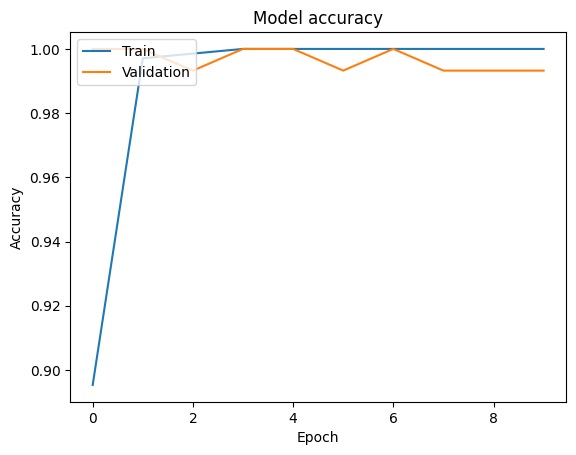

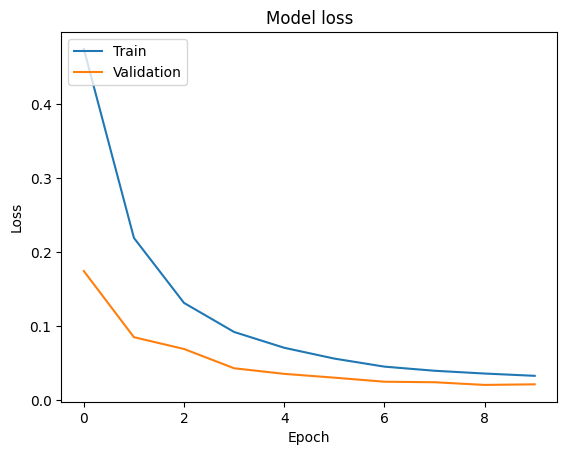

In [23]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

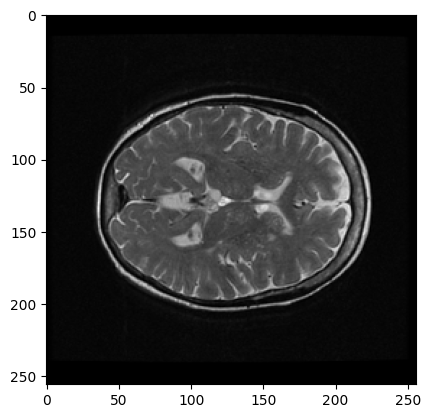

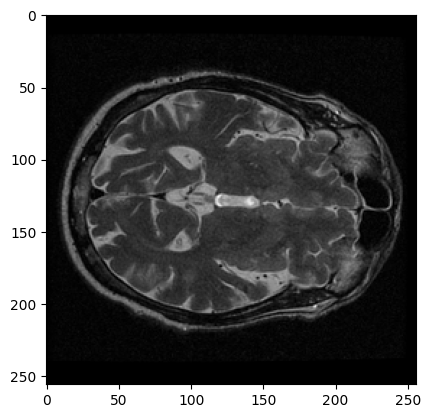

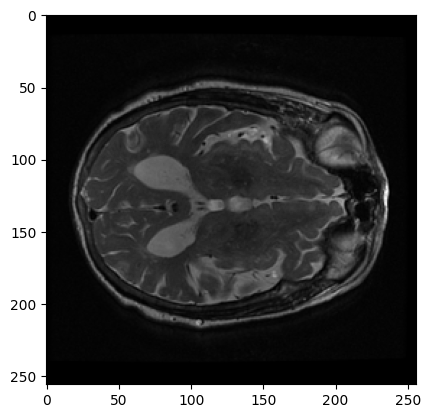

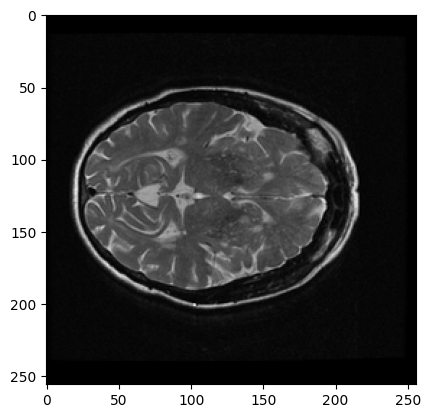

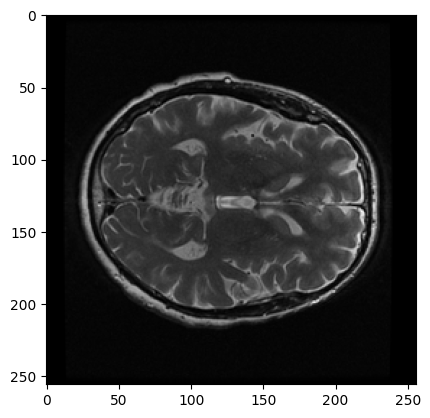

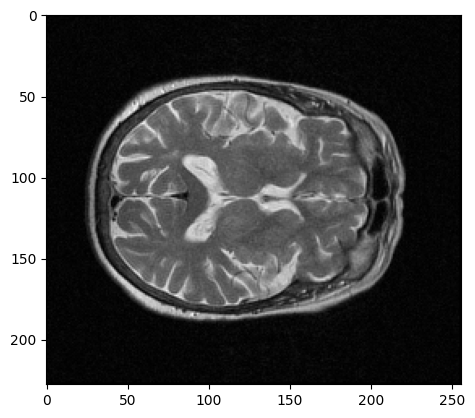

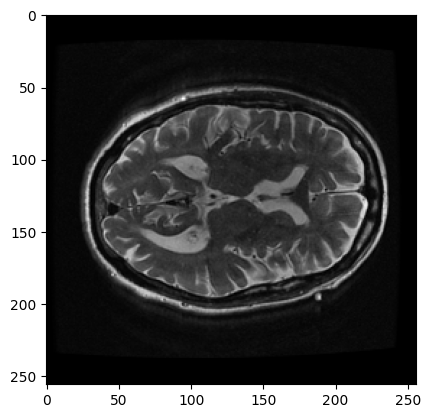

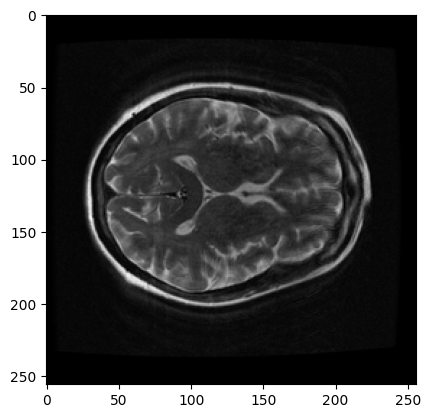

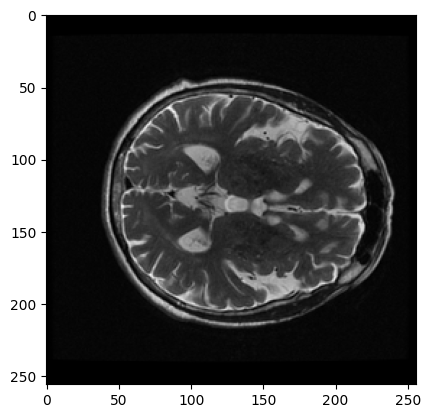

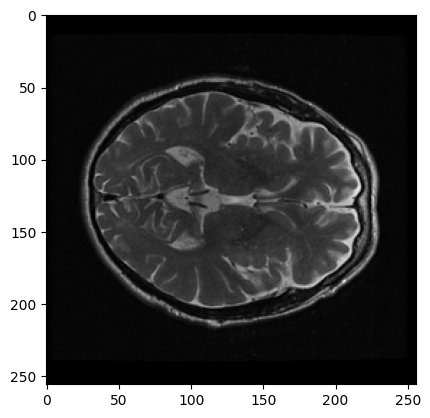

In [24]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

folder_path = 'D:\AD\AD_folder\AD_preprocess'  # add the `r` character to the string to make it a raw string, which treats backslashes as literal characters

for filename in os.listdir(folder_path):
    if filename.endswith(".nii"):
        file_path = os.path.join(folder_path, filename)
        img = nib.load(file_path)
        img_data = img.get_fdata()
        # Plot a single slice (z_slice) of the image
        z_slice = img_data.shape[2] // 2  # choose a slice in the middle of the z-axis
        # Plot the image
        plt.imshow(img_data[:, :,z_slice], cmap='gray')
        plt.show()

In [28]:
import random
import numpy as np

# Select a random subset of the test data
num_samples = 10
indices = random.sample(range(len(test_data)), num_samples)
subset_test_data = test_data[indices]
subset_test_labels = test_labels[indices]

# Evaluate the model on the random subset of the test data
_, accuracy = model.evaluate(subset_test_data, subset_test_labels)
print("Accuracy on random subset of test data: {:.2f}%".format(accuracy * 100))

# Make predictions on the random subset of the test data
predictions = model.predict(subset_test_data)

# Round the predictions to 0 or 1
rounded_predictions = np.round(predictions)

# Calculate the accuracy of the predictions
accuracy = np.mean(rounded_predictions == subset_test_labels)
print("Prediction accuracy on random subset of test data: {:.2f}%".format(accuracy * 100))

1/1 [==============================] - 1s 663ms/step - loss: 0.0157 - accuracy: 1.0000
Accuracy on random subset of test data: 100.00%
Prediction accuracy on random subset of test data: 52.00%


In [164]:
#import random

#def merge_and_split_data(mci_data, ad_data, train_ratio=0.7, validation_ratio=0.15, test_ratio=0.15):
 #   data = mci_data + ad_data
  #  total_len = len(data)
   # train_len = int(total_len * train_ratio)
    #validation_len = int(total_len * validation_ratio)
    #test_len = total_len - train_len - validation_len
    
    #random.shuffle(data)
    
    #train_data = data[:train_len]
    #validation_data = data[train_len:train_len+validation_len]
    #test_data = data[train_len+validation_len:]
    
   # return train_data, validation_data, test_data

#train_data, validation_data, test_data = merge_and_split_data(mci_data, ad_data)

#print("Training data length: ", len(train_data))
#print("Validation data length: ", len(validation_data))
#print("Test data length: ", len(test_data))

In [11]:
#import random

#def merge_and_split_data(mci_data, ad_data, train_ratio=0.7, validation_ratio=0.15, test_ratio=0.15):
 #   data = mci_data + ad_data
  #  labels = [0] * len(mci_data) + [1] * len(ad_data)
    
   # total_len = len(data)
   # train_len = int(total_len * train_ratio)
   # validation_len = int(total_len * validation_ratio)
   # test_len = total_len - train_len - validation_len
    
   # data_and_labels = list(zip(data, labels))
   # random.shuffle(data_and_labels)
    
   # train_data, train_labels = zip(*data_and_labels[:train_len])
   # validation_data, validation_labels = zip(*data_and_labels[train_len:train_len+validation_len])
   # test_data, test_labels = zip(*data_and_labels[train_len+validation_len:])
    
   # return train_data, train_labels, validation_data, validation_labels, test_data, test_labels

#train_data, train_labels, validation_data, validation_labels, test_data, test_labels = merge_and_split_data(mci_data, ad_data)

#print("Training data length: ", len(train_data))
#print("Training labels length: ", len(train_labels))
#print("Validation data length: ", len(validation_data))
#print("Validation labels length: ", len(validation_labels))
#print("Test data length: ", len(test_data))
#print("Test labels length: ", len(test_labels))

In [12]:
#train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=2)
#validation_labels = tf.keras.utils.to_categorical(validation_labels, num_classes=2)
#print(train_labels)
#print(validation_labels)

In [13]:
#import numpy as np

#train_data = np.array(train_data)
#train_labels = np.array(train_labels)
#validation_data = np.array(validation_data)
#validation_labels = np.array(validation_labels)

#print("Train data shape: ", train_data.shape)
#print("Train labels shape: ", train_labels.shape)
#print("Validation data shape: ", validation_data.shape)
#print("Validation labels shape: ", validation_labels.shape)

In [14]:
#import numpy as np

#train_data = train_data
#train_labels = train_labels

# Check the number of samples in both the input and target data
#num_train_samples = train_data.shape[0]
#num_train_labels = train_labels.shape[0]

# Make sure they match
#if num_train_samples != num_train_labels:
    #raise ValueError("Number of samples in input and target data do not match")
#else:
 #   print("Number of samples match:", num_train_samples)

# Same for validation data and labels
#validation_data = validation_data
#alidation_labels = validation_labels

#num_validation_samples = validation_data.shape[0]
#num_validation_labels = validation_labels.shape[0]

#if num_validation_samples != num_validation_labels:
#    raise ValueError("Number of samples in validation input and target data do not match")
#else:
#    print("Number of validation samples match:", num_validation_samples)

In [15]:
#print("Number of samples in training data: ", train_data.shape[0])
#print("Number of samples in training labels: ", train_labels.shape[0])
#print("Number of samples in validation data: ", validation_data.shape[0])
#print("Number of samples in validation labels: ", validation_labels.shape[0])

In [16]:
#import tensorflow as tf
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten
#from tensorflow.keras.utils import to_categorical

# Number of samples in training data
#n_train_samples = 2080

# Number of samples in validation data
#n_validation_samples = 445

# Get the shape of the training data and validation data
#train_data_shape = train_data.shape
#validation_data_shape = validation_data.shape

# Reshape the training labels to match the number of samples in the training data
#train_labels = train_labels[:n_train_samples]
#train_labels = to_categorical(train_labels)

# Reshape the validation labels to match the number of samples in the validation data
#validation_labels = validation_labels[:n_validation_samples]
#validation_labels = to_categorical(validation_labels)

# Create the ResNet50 model
#model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the layers in the model to prevent them from being retrained
#or layer in model.layers:
 #   layer.trainable = False

# Add a fully connected layer to the model
#fc_model = Sequential()
#fc_model.add(Flatten(input_shape=model.output_shape[1:]))
#fc_model.add(Dense(512, activation='relu'))
#fc_model.add(Dense(2, activation='softmax'))

# Combine the ResNet50 model and the fully connected layer
#final_model = Sequential([model, fc_model])

# Compile the model
#final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with the training data and training labels, and validate with the validation data and validation labels
#final_model.fit(train_data[:n_train_samples, :, :, :], train_labels, batch_size=32, epochs=10, validation_data=(validation_data[:n_validation_samples, :, :, :], validation_labels))

In [11]:
#import nibabel as nib
#import os
#import nibabel as nib
#from skimage.transform import resize

#folder_path = "D:\AD\AD_folder\AD_preprocess"

#for filename in os.listdir(folder_path):
 #   if filename.endswith(".nii"):
#      file_path = os.path.join(folder_path, filename)
 #       img = nib.load(file_path)
 #       data = img.get_fdata()
#      # Rescale data
 #       data = (data - data.mean()) / data.std()

       # Resize image
  #      data = resize(data, (224, 224, 3))

        # Save the processed data as a .nii file
   #     processed_img = nib.Nifti1Image(data, img.affine, img.header)
    #    processed_file_path = os.path.join(folder_path, "processed_" + filename)
     #   nib.save(processed_img, processed_file_path)

In [17]:
#import numpy as np
#import tensorflow as tf
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense, Flatten
#from sklearn.model_selection import train_test_split
#import glob
#import os

# Load the data
#AD_dir = 'D:\AD\AD_folder\AD_preprocess\processed_AD'
#files_AD = glob.glob(os.path.join(AD_dir, '*.nii'))

#MCI_dir = 'D:\MCI\MCI_folder\MCI_preprocess\processed_MCI'
#files_MCI = glob.glob(os.path.join(MCI_dir, '*.nii'))

#files = files_AD + files_MCI

# Split the data into training, validation, and testing sets
#train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)
#train_files, val_files = train_test_split(train_files, test_size=0.2 / 0.8, random_state=42)

#print("Number of training files: ", len(train_files))
#print("Number of validation files: ", len(val_files))
#print("Number of testing files: ", len(test_files))

In [18]:
#import nibabel as nib
#import numpy as np
#from scipy.ndimage import zoom

#def load_data(file):
    # Load the data from the file
 #   img = nib.load(file)
  #  img_data = img.get_fdata()

    # Rescale the image intensity to [0, 1]
   # img_data = img_data / np.max(img_data)
    
    # Resize the image to (224, 224, 3)
    #img_data = np.expand_dims(img_data, axis=-1)
    #img_data = zoom(img_data, (224 / img_data.shape[0], 224 / img_data.shape[1], 3 / img_data.shape[-1]))

    #return img_data

#def preprocess_data(files):
 #   X = []
  #  for file in files:
        # Load the data from the file
   #     img_data = load_data(file)
        
        # Append the data to the list
    #    X.append(img_data)

    # Convert the list to a numpy array
    #X = np.array(X)

    #return X


In [13]:
# Preprocess the training, validation, and testing data
#train_data = preprocess_data(train_files)
#val_data = preprocess_data(val_files)
#test_data = preprocess_data(test_files)

#print("Shape of training data: ", train_data.shape)
#print("Shape of validation data: ", val_data.shape)
#print("Shape of testing data: ", test_data.shape)

In [18]:
#import tensorflow as tf
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense, Flatten
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.optimizers import Adam

# Load ResNet50 model with pre-trained weights from ImageNet
#resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the layers
#for layer in resnet50.layers:
 #   layer.trainable = False

# Add custom layers on top of ResNet50
#x = resnet50.output
#x = Flatten()(x)
#x = Dense(512, activation='relu')(x)
#x = Dense(1, activation='sigmoid')(x)

#model = Model(inputs=resnet50.input, outputs=x)

#model.summary()

# Compile the model
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define the data generators
#train_datagen = ImageDataGenerator(
   # rescale=1./255,
   # rotation_range=30,
  ## height_shift_range=0.2,
 #   horizontal_flip=True)

#val_datagen = ImageDataGenerator(rescale=1./255)

# Define the directories
#train_dir = files
#val_dir = val_files

# Flow the training and validation data from the directories
#train_generator = train_datagen.flow_from_directory(
   # train_dir,
   # target_size=(224,224),
 #   batch_size=32,
  #  class_mode='binary')

#val_generator = val_datagen.flow_from_directory(
  #  val_dir,
#    batch_size=32,
 #   class_mode='binary')

#history = model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_data=(val_data, val_labels))

# Train the model
#history = model.fit(
 #   train_generator,
  #  steps_per_epoch=len(train_generator),
   # epochs=10,
    #validation_data=val_generator,
    #validation_steps=len(val_generator))

# Save the model
#model.save('resnet50_model.h5')

In [24]:
#import tensorflow as tf
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense, Flatten

#resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

#x = resnet50.output
#x = Flatten()(x)
#x = Dense(512, activation='relu')(x)
#x = Dense(1, activation='sigmoid')(x)

#model = Model(inputs=resnet50.input, outputs=x)

#model.summary()